<a href="https://colab.research.google.com/github/steve-keys/Assignment---1--Intro-to-Programming/blob/main/Copy_of_IntroProgramingAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment - Keys Executives Pay

#By Steven Keys - Student ID 20783967
---

#Task
Write a notebook that prompts the user for a company's stock market ticker symbol. Your program then
scrapes the Yahoo Finance website to extract information on the key of the company. Then for each
executive calculate the expected income tax based on the ATO tax tables. The user can choose if the data
will be saved as a CSV and/or stored in an SQLite database.

#Approach / Planning
My approach to this task began by utilizing the design model we were taught early in the semester, breaking the task down into smaller steps. The main steps I thought about were:

 * Inputs
 * Processing 
 * Outputs 

 I  then broke each of these main categories down into smaller tasks again, as outlined below.

 I began with "inputs" as it seemed a logical place to start and I like the input prompt function input(). Working out how to include input validation for the stock market ticker will be much more challenging however.

 ## Need to research input validation for stock market ticker symbol using form of 3 capital letters followed by dot AX - e.g. NAB.AX




##INPUTS#
1. Get Company Stock Market Ticker Symbol
  * find url - start with Google search for Yahoo Finance page

  * Need to find a way to validate the input
2. Locate table of Key Executives and their salaries from Yahoo Finance page
3. Scrap page for salary data






In [ ]:
company_ticker = input("What is your Company's Stock Market Ticker Symbol? ")
print(company_ticker)

What is your Company's Stock Market Ticker Symbol? CBA.AX
CBA.AX


In [ ]:
# Search google to find the URL that provides the salaries of the key executives for that company - eg NAB

 url = https://au.finance.yahoo.com/quote/NAB.AX/profile?p=NAB.AX

# Looking at different companies on the finance page, a pattern in the url became apparent

 https://au.finance.yahoo.com/quote/ANZ.AX/profile?p=ANZ.AX
 https://au.finance.yahoo.com/quote/CBA.AX/profile?p=CBA.AX

# The ticker symbol consistently appeared in the same two places in the url string

# I then looked for a way to make place holders in the url to accomodate these ticker symbols as variables, that would change according to the input given by the user

# Write code to insert tickers in the correct place holders in the URL

In [ ]:
# Explore how to place variables into a string - e.g. Company Ticker into url
# company_ticker = 'NAB.AX'
# url = 'https://au.finance.yahoo.com/quote/{}/profile?p={}'.format(company_ticker)
# print(url)

IndexError: ignored

In [ ]:
# Eventually I discovered through some research that even though there is only one variable in the string, because it appears in two places we need to enter it twice in the format function

company_ticker = 'NAB.AX'
url = "https://au.finance.yahoo.com/quote/{}/profile?p={}".format(company_ticker,company_ticker)
print(url)


https://au.finance.yahoo.com/quote/NAB.AX/profile?p=NAB.AX


In [9]:
company_ticker = input("What is your Company's Stock Market Ticker Symbol? ")
url = "https://au.finance.yahoo.com/quote/{}/profile?p={}".format(company_ticker,company_ticker)
print(url)

What is your Company's Stock Market Ticker Symbol? nab.ax
https://au.finance.yahoo.com/quote/nab.ax/profile?p=nab.ax


In [ ]:
#def get_ticker():
#  company_ticker = input("What is your Company's Stock Market Ticker Symbol? ")
#  url = "https://au.finance.yahoo.com/quote/{}/profile?p={}".format(company_ticker,company_ticker)
#  print(url)

  # Having trouble defining a function that uses this code to prompt the user for the ticker 

In [6]:
def get_ticker():
  company_ticker = input("What is your Company's Stock Market Ticker Symbol? ")
  url = "https://au.finance.yahoo.com/quote/{}/profile?p={}".format(company_ticker,company_ticker)
  return url

In [8]:
get_ticker()

What is your Company's Stock Market Ticker Symbol? nab


'https://au.finance.yahoo.com/quote/nab/profile?p=nab'

## INPUT VALIDATION

In [ ]:
# I need to find a method that will validate the input such that, only australian company stock market ticker symbols are accepted.
# Australian tickers always end in .AX
# Therefore, I want the input to have a ".AX" extension
# If the input has this extension I want to accept the ticker and continue to run the program
# If the ticker does not have this extension, I want to display a message to the user saying "Please make sure the ticker is an Aussie company ending in '.AX' "
# If the user enters the correct ticker format I also want to display a message saying "Thank you for entering the Aussie ticker symbol "

In [10]:
ext_want = '.AX'
get_last_3_chars = company_ticker[-3:]

In [11]:
def get_ticker():
  while True: 
    company_ticker = input("What is your Company's Stock Market Ticker Symbol? ")
    last_3_chars = company_ticker[-3:]
    if last_3_chars == '.AX':
      break
    else:
      print("Please make sure the ticker is an Aussie company ending in '.AX' ")
  return company_ticker

In [16]:
ticker_input = get_ticker()
print("Thank you for entering the Aussie ticker symbol " + ticker_input)

What is your Company's Stock Market Ticker Symbol? NAB.LL
Please make sure the ticker is an Aussie company ending in '.AX' 
What is your Company's Stock Market Ticker Symbol? CAV.OP
Please make sure the ticker is an Aussie company ending in '.AX' 
What is your Company's Stock Market Ticker Symbol? NAB.AX
Thank you for entering the Aussie ticker symbol NAB.AX


## GO TO URL
* The next step was to automatically go to the url provided by the input code and once there, 
* scrape the web page for the key executive's salary data

In [13]:
!pip install kora -q

'''load packages'''
from bs4 import BeautifulSoup
from kora.selenium import wd


     |████████████████████████████████| 57 kB 3.4 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 


In [ ]:
# This is my original input function which I subsequently replaced with a new function incorporating input validation

# def get_ticker():
 # company_ticker = input("What is your Company's Stock Market Ticker Symbol? ")
  # url = "https://au.finance.yahoo.com/quote/{}/profile?p={}".format(company_ticker,company_ticker)
  # return url

In [ ]:
# This is my original function to take the company ticker entered and build the url and get the web page
# company_ticker = input("What is your Company's Stock Market Ticker Symbol? ")
# url = "https://au.finance.yahoo.com/quote/{}/profile?p={}".format(company_ticker,company_ticker)
#wd.get(url)
# wd

In [14]:
# This is my updated function to build the URL from the modified input function that now includes validation

In [20]:
url = "https://au.finance.yahoo.com/quote/{}/profile?p={}".format(ticker_input,ticker_input)
print(url)

https://au.finance.yahoo.com/quote/NAB.AX/profile?p=NAB.AX


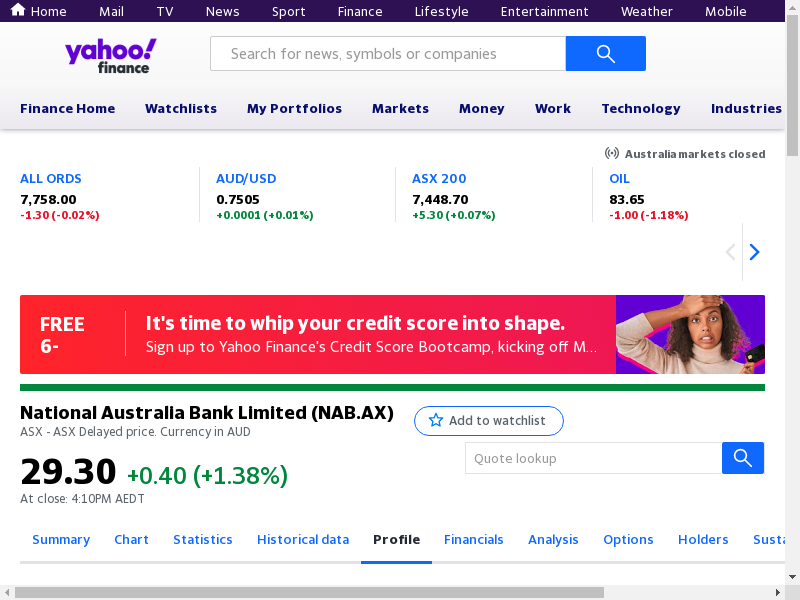

In [22]:
# This is the function used to get the webpage defined by the url built from the above function (and "wd" will display a screen shot of it)
wd.get(url)
wd

I ran a check to make sure I was going to the correct web page by taking a snap shot using the "wd" function from the kora library as demonstrated above




##PROCESSING#

1. Use salary data to compute the tax payable for each executive
2. Use tax tables and functions created in previous notebook to calculate tax payable

## Page Scraping
Now that I had a reliable and viable URL to work with, I explored the use of functions that would go to the page and scrape it for the correct table needed to extract the Executive's names, title and pay


In [23]:
# The following code will get the page for me using the url supplied by the input function above
wd.get(url)
soup = BeautifulSoup(wd.page_source, "html.parser")

In [ ]:
# I can view and check the soup if I want to..
soup

In [ ]:
# I can also check I have the correct web page using "wd" to take a screen shot...
wd

In [ ]:
# I've looked at the page source and inspected the above table in it, and now want to see how many tables there are in total on the page...
table = soup.find_all('table')
len(table)

In [ ]:
# As I can see now that there is only one table I can use the find command...
table = soup.find('table')
len(table)

In [ ]:
# And now I just want to look at the table itself...
table = soup.find('table')
table

In [ ]:
# now I would like to check the body in the table, which from what I have seen when inspecting the page, contains the Executives' names, titles and pays which I need for processing the tax payable by each
table = soup.find('table')
body = table.find_all('tbody')
body

In [30]:
# now I want to find the number of individual rows within the table to check that I have captured them all in the table I'm after........
table = soup.find('table')
body = table.find('tbody')
rows = body.find_all('tr')
len(rows)
# ten is correct

10

In [31]:
# Exploring the rows ........
table = soup.find('table')
body = table.find('tbody')
rows = body.find_all('tr')
rows[0].text

'Mr. Ross Maxwell McEwan CBE, B.B.S.Group CEO, MD & Director2.54MN/A1957'

In [32]:
# To begin with I will just process one row to gain an understanding and process all rows later ...
row = rows[0]

In [33]:
# Checking the number of columns.....
cells = row.find_all('td')
len(cells)

# 5 collumns is correct...Name, Title, Pay,Exercised, Year born

5

In [34]:
# Exporing individual cells......
cells = row.find_all('td')
cells[0]

<td class="Ta(start)" data-reactid="51"><span class="" data-reactid="52"><!-- react-text: 53 -->Mr. Ross Maxwell McEwan CBE, B.B.S.<!-- /react-text --></span></td>

In [35]:
cells = row.find_all('td')
name = cells[0].text
title = cells[1].text
pay = cells[2].text
print(name)
print(title)
print(pay)

Mr. Ross Maxwell McEwan CBE, B.B.S.
Group CEO, MD & Director
2.54M


In [36]:
# Now I can create a function to extract these first three cells....
def get_name_title_pay(row):
  cells = row.find_all('td')
  name = cells[0].text
  title = cells[1].text
  pay = cells[2].text
  return {'name': name, 'title':title, 'pay': pay}
  # this is returning a dictionary - 'name' is a key for example


In [37]:
# get_name_title_pay(rows[3])

In [38]:
# now I need to capture all the rows...
exec_details = []
for row in rows:
  result = get_name_title_pay(row)
  exec_details.append(result)

print(exec_details)

[{'name': 'Mr. Ross Maxwell McEwan CBE, B.B.S.', 'title': 'Group CEO, MD & Director', 'pay': '2.54M'}, {'name': 'Mr. Gary Andrew Lennon BEC, F.C.A., BEc (Hons), FCA', 'title': 'Group Chief Financial Officer', 'pay': '1.13M'}, {'name': 'Mr. Patrick F. Wright', 'title': 'Group Exec. of Technology & Enterprise Operations', 'pay': '1.72M'}, {'name': 'Ms. Sharon J. Cook', 'title': 'Group Exec. of Legal & Commercial Services', 'pay': '912.98k'}, {'name': 'Ms. Susan  Ferrier', 'title': 'Group Exec. of People & Culture', 'pay': '929.27k'}, {'name': 'Ms. Angela  Mentis B.Bus', 'title': 'Group Chief Digital, Data & Analytics Officer', 'pay': '1.62M'}, {'name': 'Mr. Shaun  Dooley', 'title': 'Chief Risk Officer', 'pay': '1.05M'}, {'name': 'Mr. Andrew  Irvine', 'title': 'Chief Exec. of Bus. Private Banking Division', 'pay': '333.27k'}, {'name': 'Mr. Lesile D. Matheson', 'title': 'Group Chief Operating Officer', 'pay': 'N/A'}, {'name': 'Ms. Sally  Mihell', 'title': 'Head of Investor Relations', 'pay

In [39]:
# I then turned the above lines of code into the one function
def get_exec_details(soup):
  table = soup.find('table')
  body = table.find('tbody')
  rows = body.find_all('tr')
  exec_details = []
  for row in rows:
    result = get_name_title_pay(row)
    exec_details.append(result)
print(exec_details)

[{'name': 'Mr. Ross Maxwell McEwan CBE, B.B.S.', 'title': 'Group CEO, MD & Director', 'pay': '2.54M'}, {'name': 'Mr. Gary Andrew Lennon BEC, F.C.A., BEc (Hons), FCA', 'title': 'Group Chief Financial Officer', 'pay': '1.13M'}, {'name': 'Mr. Patrick F. Wright', 'title': 'Group Exec. of Technology & Enterprise Operations', 'pay': '1.72M'}, {'name': 'Ms. Sharon J. Cook', 'title': 'Group Exec. of Legal & Commercial Services', 'pay': '912.98k'}, {'name': 'Ms. Susan  Ferrier', 'title': 'Group Exec. of People & Culture', 'pay': '929.27k'}, {'name': 'Ms. Angela  Mentis B.Bus', 'title': 'Group Chief Digital, Data & Analytics Officer', 'pay': '1.62M'}, {'name': 'Mr. Shaun  Dooley', 'title': 'Chief Risk Officer', 'pay': '1.05M'}, {'name': 'Mr. Andrew  Irvine', 'title': 'Chief Exec. of Bus. Private Banking Division', 'pay': '333.27k'}, {'name': 'Mr. Lesile D. Matheson', 'title': 'Group Chief Operating Officer', 'pay': 'N/A'}, {'name': 'Ms. Sally  Mihell', 'title': 'Head of Investor Relations', 'pay

In [40]:
exec_details = []
for row in rows:
  result = get_name_title_pay(row)
  print(result)

{'name': 'Mr. Ross Maxwell McEwan CBE, B.B.S.', 'title': 'Group CEO, MD & Director', 'pay': '2.54M'}
{'name': 'Mr. Gary Andrew Lennon BEC, F.C.A., BEc (Hons), FCA', 'title': 'Group Chief Financial Officer', 'pay': '1.13M'}
{'name': 'Mr. Patrick F. Wright', 'title': 'Group Exec. of Technology & Enterprise Operations', 'pay': '1.72M'}
{'name': 'Ms. Sharon J. Cook', 'title': 'Group Exec. of Legal & Commercial Services', 'pay': '912.98k'}
{'name': 'Ms. Susan  Ferrier', 'title': 'Group Exec. of People & Culture', 'pay': '929.27k'}
{'name': 'Ms. Angela  Mentis B.Bus', 'title': 'Group Chief Digital, Data & Analytics Officer', 'pay': '1.62M'}
{'name': 'Mr. Shaun  Dooley', 'title': 'Chief Risk Officer', 'pay': '1.05M'}
{'name': 'Mr. Andrew  Irvine', 'title': 'Chief Exec. of Bus. Private Banking Division', 'pay': '333.27k'}
{'name': 'Mr. Lesile D. Matheson', 'title': 'Group Chief Operating Officer', 'pay': 'N/A'}
{'name': 'Ms. Sally  Mihell', 'title': 'Head of Investor Relations', 'pay': 'N/A'}


In [ ]:
## Steps
#1. Get the income
#2. Calculate the tax payable

# Step 1 - Get the income amount
income = int(input("What is your income for the year? "))
print("Your income is " , income)

# Step 2 - Calculate the tax payable
# if you earn $18,200, then pay no tax
# else if you earn between $18,201 – $45,000, 
#    then pay 0.19 cents for every dollar over 18,200

if income <= 18200:
  tax_payable = 0
elif 18200 < income <= 45000: 
  tax_payable = 0.19 * (income - 18200)
elif 45000 < income <= 120000:
  tax_payable = 5092 + 0.32 * (income - 45000)
elif 120000 < income <= 180000:
  tax_payable = 29467 + 0.37 * (income - 120000)
elif income > 180000:     
  tax_payable = 51667 + 0.45 * (income - 180000)        
print("Your tax payable is ", tax_payable)

In [ ]:
def get_income():
  '''
  This function will prompt the user for the income and return the value
  '''
  income = int(input("What is your income for the year? "))
  print("Your income is " , income)
  return income

In [ ]:
def calculate_tax (income):
  if income <= 18200:
    tax_payable = 0
  elif 18200 < income <= 45000: 
    tax_payable = 0.19 * (income - 18200)
  elif 45000 < income <= 120000:
    tax_payable = 5092 + 0.32 * (income - 45000)
  elif 120000 < income <= 180000:
    tax_payable = 29467 + 0.37 * (income - 120000)
  elif income > 180000:     
    tax_payable = 51667 + 0.45 * (income - 180000)        
  
  return tax_payable

In [ ]:
# 'Main line'

# Step 1
income = get_income ()
# Step 2
tax = calculate_tax(income)

print("Your tax payable is ", tax)

# Lets manually calculate the income tax
```
Mr. Ross Maxwell McEwan CBE, B.B.S.	Group CEO, MD & Director	2.54M	N/A	1957
Mr. Gary Andrew Lennon BEC, F.C.A., BEc (Hons), FCA	Group Chief Financial Officer	1.13M	N/A	N/A
Mr. Patrick F. Wright	Group Exec. of Technology & Enterprise Operations	1.72M	N/A	1967
Ms. Sharon J. Cook	Group Exec. of Legal & Commercial Services	912.98k	N/A	N/A
Ms. Susan Ferrier	Group Exec. of People & Culture	929.27k	N/A	N/A
Ms. Angela Mentis B.Bus	Group Chief Digital, Data & Analytics Officer	1.62M	N/A	N/A
Mr. Shaun Dooley	Chief Risk Officer	1.05M	N/A	N/A
Mr. Andrew Irvine	Chief Exec. of Bus. Private Banking Division	333.27k	N/A	N/A
Mr. Lesile D. Matheson	Group Chief Operating Officer	N/A	N/A	1960
Ms. Sally Mihell	Head of Investor Relations	N/A	N/A	N/A
```

##OUTPUTS#
* Create a Panda data frame
* Save data in CSV and/or
* Store in an SQLite database

* Allow user to choose how data is saved 
* Use widgets to provide GUI interface to allow user to choose 